# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [1]:
# %pip install --upgrade plotly

###  Import Statements


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [4]:
df_data = pd.read_csv('NLSY97_subset.csv')

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

In [5]:
variables_names_and_descriptions = pd.read_csv('NLSY97_Variable_Names_and_Descriptions.csv')

In [6]:
variables_names_and_descriptions.head()

,Personal variables,Variable Type,Description
0,FEMALE,D,"Sex of respondent (0 if male, 1 if female)"
1,MALE,D,"Sex of respondent (1 if male, 0 if female)"
2,NaN,NaN,NaN
3,Ethnicity:,NaN,NaN
4,ETHBLACK,D,Black


# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

##### Shape

In [7]:
df_data.shape

(2000, 96)

##### Number of rows and columns

In [8]:
print(f'Number of rows: {df_data.shape[0]}')
print(f'Number of columns: {df_data.shape[1]}')

Number of rows: 2000
Number of columns: 96


##### Column names

In [9]:
df_data.columns

Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS',
       'CATSE', 'COLLBARG', 'URBAN'

##### Any missing values?

In [10]:
df_data.isna().values.any()

True

##### Any duplicate values?

In [11]:
df_data.duplicated().any()

True

## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [12]:
df_data = df_data.drop_duplicates()

## Descriptive Statistics

In [13]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1487 entries, 0 to 1995
Data columns (total 96 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1487 non-null   int64  
 1   EARNINGS  1487 non-null   float64
 2   S         1487 non-null   int64  
 3   EXP       1487 non-null   float64
 4   FEMALE    1487 non-null   int64  
 5   MALE      1487 non-null   int64  
 6   BYEAR     1487 non-null   int64  
 7   AGE       1487 non-null   int64  
 8   AGEMBTH   1453 non-null   float64
 9   HHINC97   1205 non-null   float64
 10  POVRAT97  1203 non-null   float64
 11  HHBMBF    1487 non-null   int64  
 12  HHBMOF    1487 non-null   int64  
 13  HHOMBF    1487 non-null   int64  
 14  HHBMONLY  1487 non-null   int64  
 15  HHBFONLY  1487 non-null   int64  
 16  HHOTHER   1487 non-null   int64  
 17  MSA97NO   1487 non-null   int64  
 18  MSA97NCC  1487 non-null   int64  
 19  MSA97CC   1487 non-null   int64  
 20  MSA97NK   1487 non-null   int6

In [14]:
df_data.describe()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
count,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,453.00","1,205.00",...,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00"
mean,"3,547.13",18.81,14.56,6.70,0.49,0.51,"1,982.07",28.93,26.32,"58,310.67",...,0.78,0.16,0.27,0.34,0.23,0.05,0.54,0.41,0.00,0.00
std,"2,009.84",12.00,2.77,2.86,0.50,0.50,1.38,1.38,5.08,"43,868.05",...,0.43,0.36,0.44,0.47,0.42,0.21,0.50,0.49,0.04,0.00
min,1.00,2.00,6.00,0.00,0.00,0.00,"1,980.00",27.00,12.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,888.00",11.41,12.00,4.65,0.00,0.00,"1,981.00",28.00,23.00,"32,000.00",...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,474.00",15.75,15.00,6.63,0.00,1.00,"1,982.00",29.00,26.00,"50,500.00",...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,"5,160.50",22.60,16.00,8.71,1.00,1.00,"1,983.00",30.00,30.00,"72,000.00",...,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00
max,"8,980.00",132.89,20.00,14.73,1.00,1.00,"1,984.00",31.00,45.00,"246,474.00",...,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00


## Visualise the Features

##### Years of schooling (highest grade completed as of 2011)

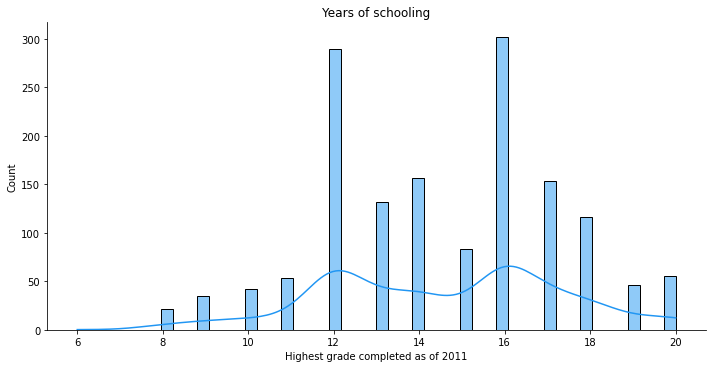

In [15]:
sns.displot(df_data['S'],
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')

plt.title('Years of schooling')
plt.xlabel('Highest grade completed as of 2011')

plt.show()

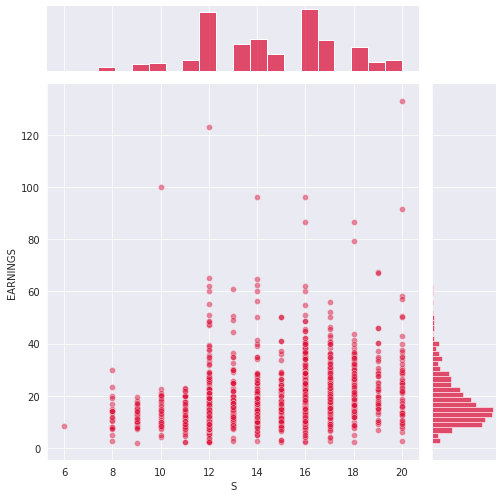

In [16]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=df_data['S'],
                y=df_data['EARNINGS'],
                height=7,
                color='crimson',
                joint_kws={'alpha':0.5})

##### Total out-of-school work experience (years) as of the 2011 interview

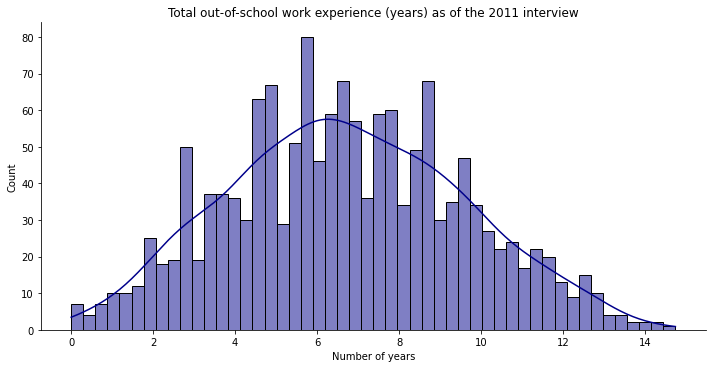

In [17]:
sns.displot(df_data['EXP'],
            bins=50, 
            aspect=2,
            kde=True, 
            color='darkblue')

plt.title('Total out-of-school work experience (years) as of the 2011 interview')
plt.xlabel('Number of years')

plt.show()

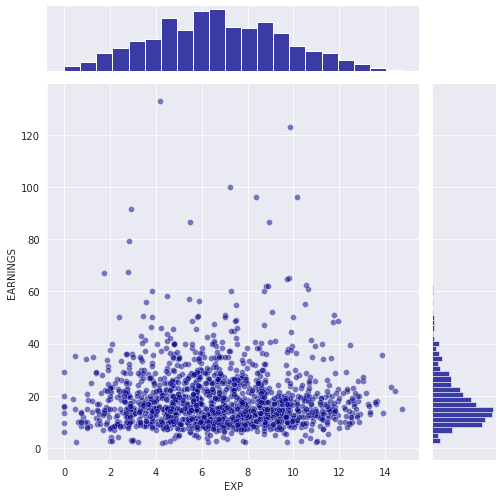

In [18]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=df_data['EXP'],
                y=df_data['EARNINGS'],
                height=7,
                color='darkblue',
                joint_kws={'alpha':0.5})

##### Current hourly earnings in $ reported at the 2011 interview

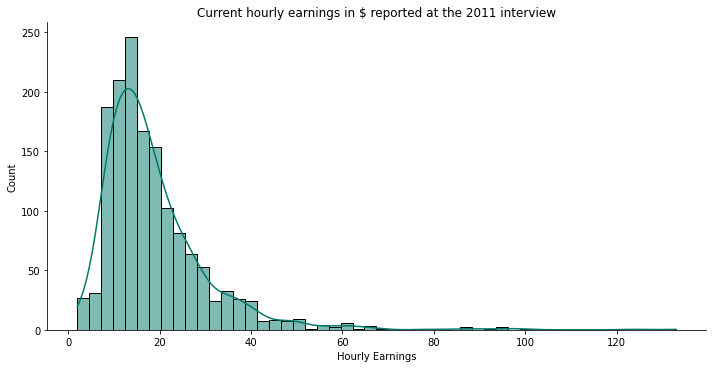

In [19]:
sns.displot(df_data['EARNINGS'],
            bins=50, 
            aspect=2,
            kde=True, 
            color='#00796b')

plt.title('Current hourly earnings in $ reported at the 2011 interview')
plt.xlabel('Hourly Earnings')

plt.show()

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [20]:
# Target = Explained variable (y)
# Features = Explanatory variables (x)

target = df_data['EARNINGS']
features = df_data[['S', 'EXP']] # only using these two features

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

In [21]:
regression = LinearRegression()

In [22]:
# Only using variable years_of_schooling (variable S)

X_train_simple_linear_regression = X_train['S'].values.reshape(-1, 1)

X_test_simple_linear_regression = X_test['S'].values.reshape(-1, 1)

In [23]:
regression.fit(X_train_simple_linear_regression, y_train)

LinearRegression()

In [24]:
rsquared = regression.score(X_train_simple_linear_regression, y_train)
print(f'Training data r-squared: {rsquared:.2}')

Training data r-squared: 0.081


### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [25]:
# Theta one (slope)
regression.coef_

array([1.21917798])

The Coefficient has the expected sign (+): `An increase in the variable S (years of schooling) will have a positive effect on the Response Variable (EARNINGS).`

In this case, `for an additional year of schooling (explanatory variable), one can expect an increase of 1.21 extra dollars in EARNINGS (response variable).`


In [26]:
# Theta zero (y-axis intercept)
regression.intercept_

1.0289074107474185

### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

In [27]:
# Residuals is the difference between the model's X_train preidctions and the values of y_train

predicted_values = regression.predict(X_test_simple_linear_regression)

residuals = y_test - predicted_values

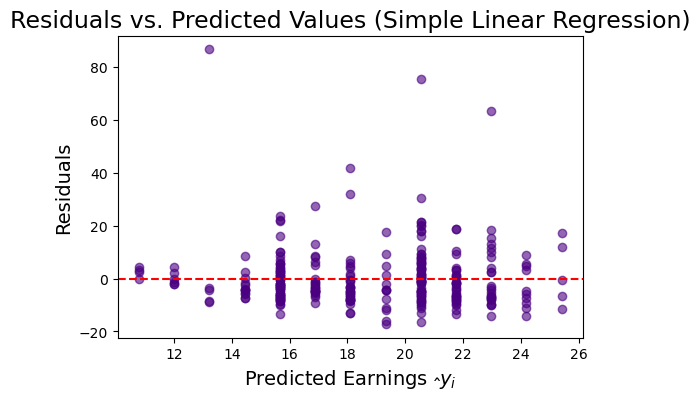

In [28]:
plt.figure(dpi=100)
plt.scatter(x=predicted_values,
            y=residuals,
            c='indigo', 
            alpha=0.6)  

plt.title('Residuals vs. Predicted Values (Simple Linear Regression)', fontsize=17)
plt.xlabel('Predicted Earnings $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)

plt.axhline(y=0, color= 'r', ls='--')

plt.show()

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [29]:
regression.fit(X_train, y_train)

LinearRegression()

In [30]:
rsquared = regression.score(X_train, y_train)
print(f'Training data r-squared: {rsquared:.2}')

Training data r-squared: 0.12


### Evaluate the Coefficients of the Model

In [31]:
# Theta one (slope)
regression.coef_

array([1.79422175, 0.97900689])

In [32]:
# Theta zero (y-axis intercept)
regression.intercept_

-13.887792110638934

### Analyse the Estimated Values & Regression Residuals

In [33]:
# Residuals is the difference between the model's X_train preidctions and the values of y_train

predicted_values = regression.predict(X_test)

residuals = y_test - predicted_values 

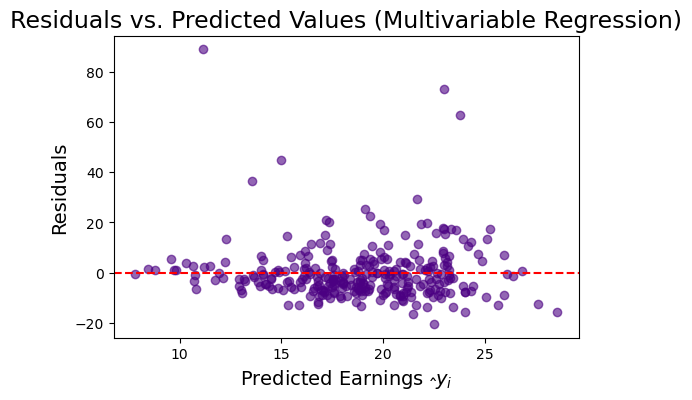

In [34]:
plt.figure(dpi=100)
plt.scatter(x=predicted_values,
            y=residuals,
            c='indigo', 
            alpha=0.6)  

plt.title('Residuals vs. Predicted Values (Multivariable Regression)', fontsize=17)
plt.xlabel('Predicted Earnings $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)

plt.axhline(y=0, color= 'r', ls='--')

plt.show()

# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [35]:
log_regression_coefficeints = pd.DataFrame(data=regression.coef_, index=X_train.columns, columns=['Coefficients'])
log_regression_coefficeints

,Coefficients
S,1.79
EXP,0.98


In [36]:
# (Using Multivariable Regression Model: mode than 1 variable as a feature)
# y = intercept + Coefficient_variable_S * variable_S + Coefficient_variable_EXP * variable_EXP
# S = years of schooling => (12 + 4)
# EXP = years of work experience => 5

result = regression.intercept_ + regression.coef_[0] * (12 + 4) + regression.coef_[1] * 5

print(f'In 2011, someone with a bachelors degree (12 + 4) years of schooling and 5 years of work experience can expect \nto earn ${round(result, 2)} hourly.')


In 2011, someone with a bachelors degree (12 + 4) years of schooling and 5 years of work experience can expect 
to earn $19.71 hourly.


# Experiment and Investigate Further

Which other features could you consider adding to further improve the regression to better predict earnings? 

In [37]:
# Age, Gender and Demographics are features that may be used to improve our predictive model

---